## Libraries import

In [1]:
library(tidyverse)
library(survival)
library(mice)
library(ggridges)

── Attaching packages ────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




## Data loading

In [3]:
avatar_100 <- untar("../../datasets/AIDS/AIDS_base_100times.csv.tar.bz2")
avatar_100 <- read.csv("AIDS_base_100times.csv", na.strings = c("NA", "", NA))
categorical <- c("hemo", "homo", "drugs", "karnof", "oprior", "z30", "zprior", "race", "gender", "str2", "strat", "symptom", "treat", "offtrt", "r", "cens", "arms")
avatar_100[categorical] <- lapply(avatar_100[categorical], factor)

In [4]:
avatar_100

age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,⋯,cd40,cd420,cd496,r,cd80,cd820,cens,days,arms,iter
<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,⋯,<int>,<int>,<dbl>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<int>
36,70.93000,0,0,0,100,0,0,1,0,⋯,379,490,524,1,596,695,0,1055,2,0
24,59.07050,0,0,0,100,0,1,1,653,⋯,186,195,NA,0,652,721,0,987,1,0
40,77.40000,0,1,0,90,0,1,1,1013,⋯,318,258,273,1,2164,1493,0,987,2,0
39,75.40000,0,1,0,90,0,1,1,933,⋯,313,351,NA,0,1188,956,0,1099,3,0
33,75.59300,0,1,0,100,0,1,1,1092,⋯,433,409,468,1,703,708,0,1118,0,0
41,84.87700,0,1,0,100,0,1,1,1106,⋯,296,333,413,1,1037,687,0,1153,3,0
40,66.94790,0,1,0,90,0,1,1,701,⋯,317,233,141,1,686,492,1,561,0,0
33,68.88360,0,1,0,100,0,1,1,1355,⋯,463,361,363,1,762,589,0,1099,0,0
38,71.40000,0,1,0,80,0,1,1,845,⋯,193,216,24,1,646,467,1,673,1,0


In [5]:
res_original <- read.csv("../../datasets/results_df/supplemental_table_aids.csv")
res_original <- subset(res_original, subset = str_detect(X, "Original"))
res_original$arm <- c("arms1", "arms2", "arms3") 
res_original$y <- c(1,2,3)

## Graphical parameters

In [6]:
colors <- read.csv("../../color.csv", stringsAsFactors = FALSE)
rownames(colors) <- colors$type

In [7]:
axis_title_size <- 19
axis_text_size <- 19
legend_text_size <- 19
legend_title_size <- 19

## Survival analysis

In [8]:
defaultW <- getOption("warn")
options(warn = -1)
res_avatar_100 <- data.frame()
for (i in unique(avatar_100$iter)) {
    avatar_temp <- subset(x = avatar_100, subset = (iter == i))
    avatar_imp <- complete(mice(avatar_temp, m = 1, maxit = 50, seed = 500, printFlag = FALSE), 1)
    avatar_temp$cd496 <- avatar_imp$cd496 
    summary_cox <- summary(coxph(Surv(time = days/7, event = cens == 1) ~ arms, data = avatar_temp))
    res_avatar <- data.frame(cbind(summary_cox$coefficients[, c("exp(coef)", "Pr(>|z|)")], summary_cox$conf.int[, c("lower .95", "upper .95")]))
    res_avatar$iter <- i
    res_avatar$arm <- rownames(res_avatar)
    res_avatar_100 <- rbind(res_avatar_100, res_avatar)
}
options(warn = defaultW)

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot() +
    geom_density_ridges(data = res_avatar_100, aes(x = exp.coef., y = arm), scale = 0.9, size = 0.2, fill = colors["avatar", "color"], alpha = 0.5) +
    geom_vline(xintercept = 1, lty = 2) +
    geom_segment(data = res_original, aes(x = Hazard.Ratio, xend = Hazard.Ratio, y = y - 0.01, yend = y + 0.9), col = colors["original", "color"], size = 1.4, lty = 2) +
    theme_bw() +
    ylab("") +
    xlim(c(0.25,1)) +
    xlab("Hazard Ratio") +
    scale_y_discrete(labels = c("Arm 1", "Arm 2", "Arm 3"), expand = expansion(mult = c(0.1, 0.35))) +
    theme(axis.title.x = element_text(size = axis_title_size, face = "bold"),
          axis.text.x = element_text(size = axis_text_size),
          axis.text.y = element_text(color = "gray30", size = axis_text_size, face = "bold"))

Picking joint bandwidth of 0.0161



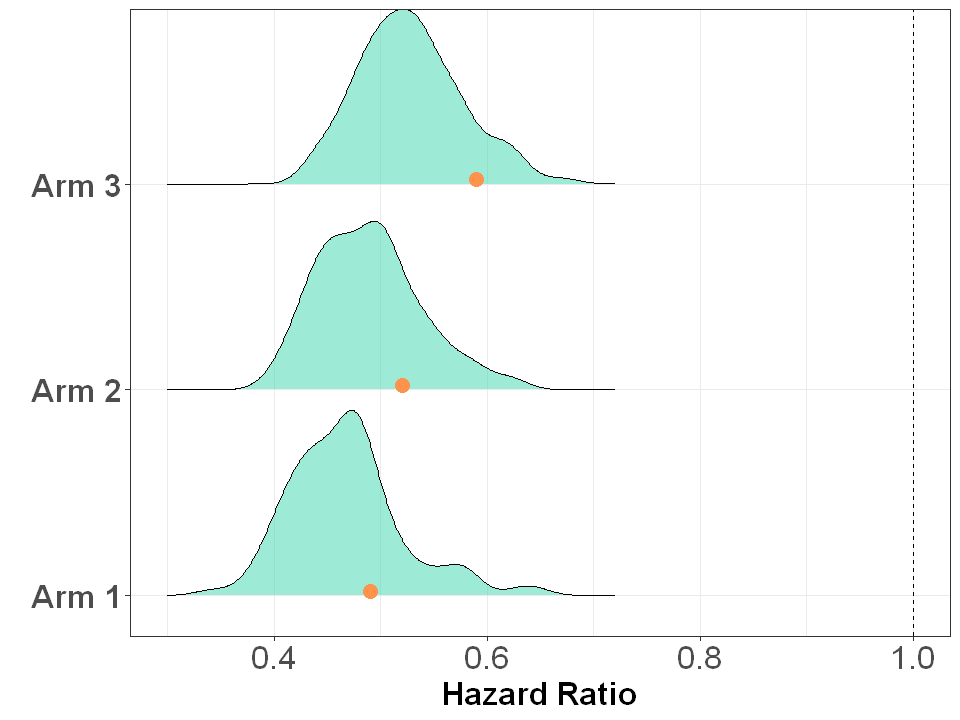

In [9]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot() +
    geom_density_ridges(data = res_avatar_100, aes(x = exp.coef., y = arm), scale = 0.9, size = 0.2, fill = colors["avatar", "color"], alpha = 0.5) +
    geom_vline(xintercept = 1, lty = 2) +
    geom_point(data = res_original, aes(x = Hazard.Ratio, y = y + 0.02), col = colors["original", "color"], size = 4) +
    theme_bw() +
    ylab("") +
    xlim(c(0.3,1)) +
    xlab("Hazard Ratio") +
    scale_y_discrete(labels = c("Arm 1", "Arm 2", "Arm 3"), expand = expansion(mult = c(0.1, 0.35))) +
    theme(axis.title.x = element_text(size = axis_title_size, face = "bold"),
          axis.text.x = element_text(size = axis_text_size),
          axis.text.y = element_text(color = "gray30", size = axis_text_size, face = "bold"))